In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pickle
plt.rcParams.update({'font.size': 14})


In [2]:
with open("../WorkArea/results/GMI/hist_gmi_jan.pickle", "rb") as f:
    hist_gmi = pickle.load(f)
    hist_gmi1 = pickle.load(f)
    hist_gmi2 = pickle.load(f)
    hist_gmi3 = pickle.load(f)
    bins      = pickle.load(f)
    f.close()

In [3]:
with open("../WorkArea/results/GMI/hist_lpa_jan.pickle" , "rb") as f:
    hist_lpa = pickle.load(f)
    hist_lpa1 = pickle.load(f)
    hist_lpa2 = pickle.load(f)
    hist_lpa3 = pickle.load(f)
    bins      = pickle.load(f)
    f.close()

In [4]:
with open("../WorkArea/results/GMI/hist_lpa_pr1_jan.pickle" , "rb") as f:
    hist_lpa_pr1 = pickle.load(f)
    hist_lpa1_pr1 = pickle.load(f)
    hist_lpa2_pr1 = pickle.load(f)
    hist_lpa3_pr1 = pickle.load(f)
    bins          = pickle.load(f)
    f.close()

In [5]:
with open("../WorkArea/results/GMI/hist_esa_jan.pickle" , "rb") as f:
    hist_esa  = pickle.load(f)
    hist_esa1 = pickle.load(f)
    hist_esa2 = pickle.load(f)
    hist_esa3 = pickle.load(f)
    bins      = pickle.load(f)
    f.close()

In [6]:
with open("../WorkArea/results/GMI/hist_esa_pr1_jan.pickle" , "rb") as f:
    hist_esa_pr1  = pickle.load(f)
    hist_esa1_pr1 = pickle.load(f)
    hist_esa2_pr1 = pickle.load(f)
    hist_esa3_pr1 = pickle.load(f)
    bins          = pickle.load(f)
    f.close()

In [7]:
bin_center = (bins[1:] + bins[:-1])*0.5

In [8]:
def plot_pdfs(hist_gmi, hist_lpa, hist_lpa_pr1, hist_esa, hist_esa_pr1, bin_center, filename = "PDF_TB_jan.pdf" ):
    fig, ax = plt.subplots(2,2, figsize = [12, 12])
    ax = ax.ravel()
    titles = ["166V GHz", "166H GHz", "183.31+-3 GHz", "183.31+-7 GHz"]
    for i in range(4):
        ax[i].plot(bin_center, hist_gmi[:, i], '-k', label = "GMI")
        ax[i].plot(bin_center, hist_lpa[:, i], '--', label = "LPA")
        ax[i].plot(bin_center, hist_lpa_pr1[:, i], '--', label = "LPA_pr1")
        ax[i].plot(bin_center, hist_esa[:, i], '--', label = "ESA")
        ax[i].plot(bin_center, hist_esa_pr1[:, i], '-.' ,label = "ESA_pr1")
        ax[i].set_yscale("log")

        ax[i].legend()
        ax[i].set_title(titles[i])
        ax[i].grid('on', alpha = 0.2)

    ax[2].set_xlabel("TB [K]")
    ax[2].set_ylabel("PDF ")   
    ax[3].set_xlabel("TB [K]")
    ax[0].set_ylabel("PDF ")   
    fig.savefig("PDF_TB_jan.pdf", bbox_inches = "tight")

In [32]:
def mean_TB(hist, bin_center):
    atb = np.zeros([4])
    for i in range(4):
        atb[i] = np.sum(bin_center[:69] * hist[:69, i] * 2)/np.sum(hist[:69, i] * 2)
    return atb

In [45]:
atb_gmi = mean_TB(hist_gmi, bin_center)
atb_lpa = mean_TB(hist_lpa, bin_center)

dtb = np.std(atb_gmi - atb_lpa)
dtb

1.7034959091256168

In [37]:
atb_lpa

array([202.80100712, 200.91572876, 209.78134041, 204.26638344])

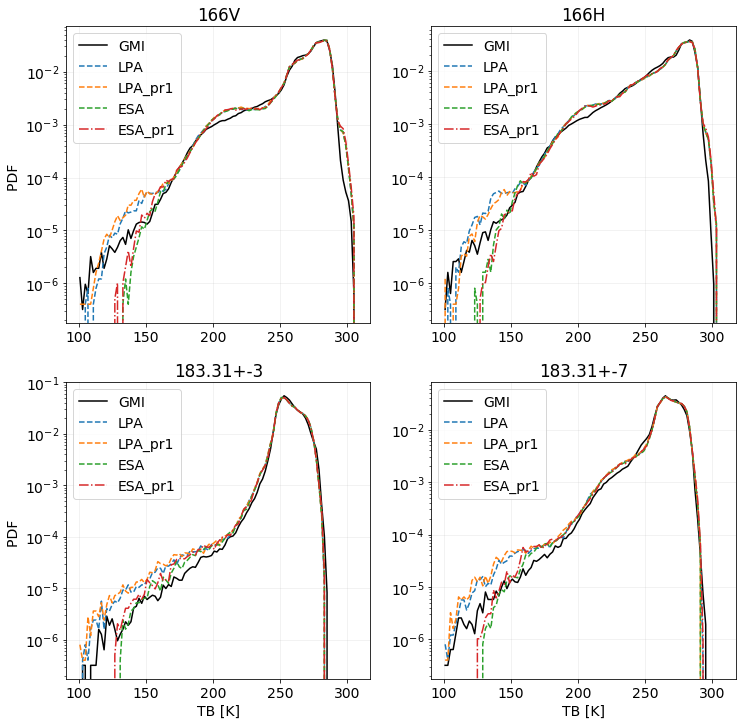

In [9]:
plot_pdfs(hist_gmi, hist_lpa, hist_lpa_pr1, hist_esa, hist_esa_pr1, bin_center, filename = "PDF_TB_jan.pdf" )

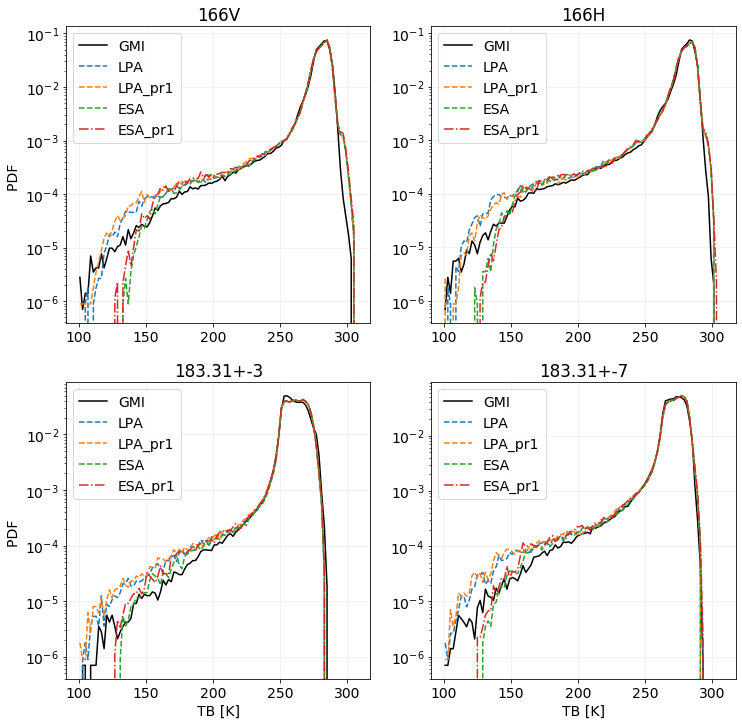

In [10]:
plot_pdfs(hist_gmi1, hist_lpa1, hist_lpa1_pr1, hist_esa1, hist_esa1_pr1, bin_center, filename = "PDF_TB_jan_tropics.pdf" )

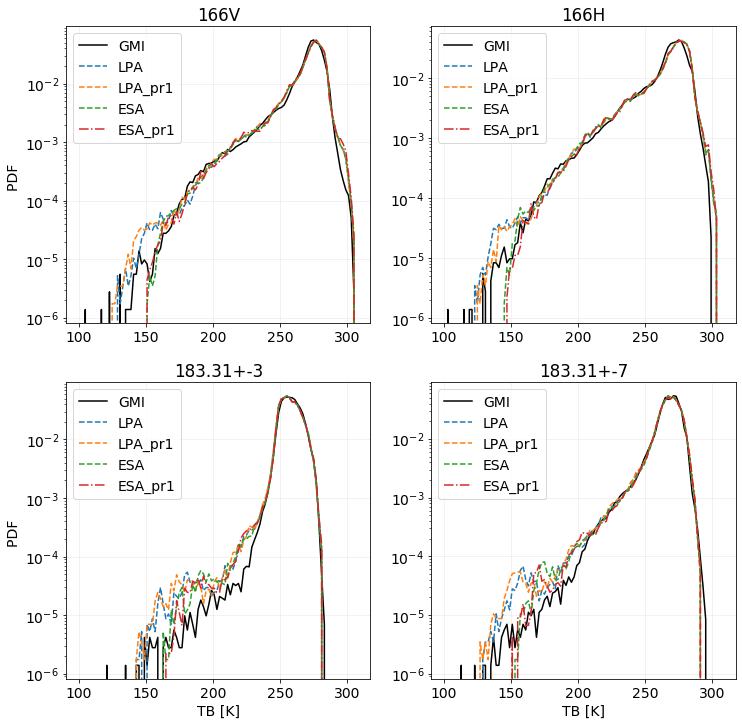

In [11]:
plot_pdfs(hist_gmi2, hist_lpa2, hist_lpa2_pr1, hist_esa2, hist_esa2_pr1, bin_center, filename = "PDF_TB_jan_mlat.pdf" )

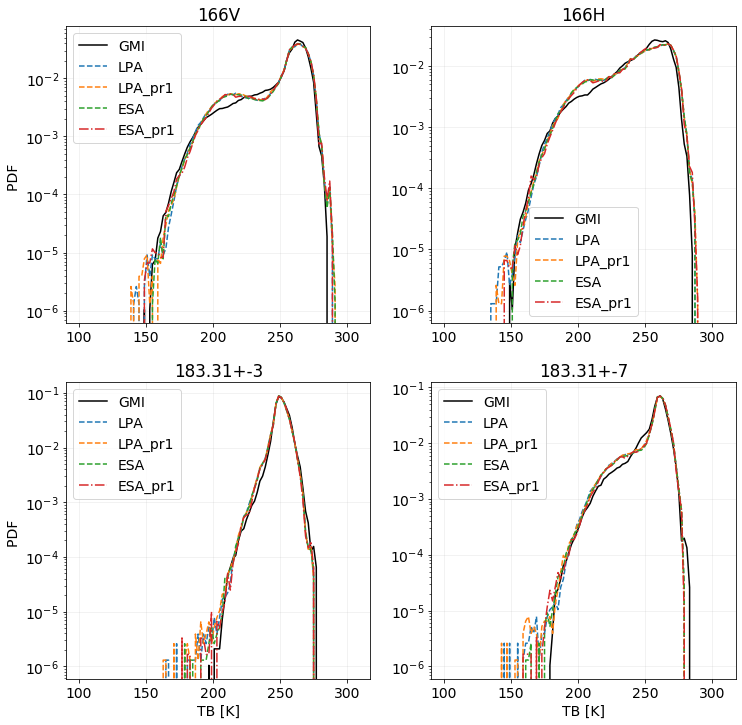

In [12]:
plot_pdfs(hist_gmi3, hist_lpa3, hist_lpa3_pr1, hist_esa3, hist_esa3_pr1, bin_center, filename = "PDF_TB_jan_hlat.pdf" )

In [13]:
with open("../WorkArea/GMI/hist_gmi_jun.pickle", "rb") as f:
    hist_gmi = pickle.load(f)
    bins     = pickle.load(f)
    f.close()

In [14]:
with open("../WorkArea/GMI/hist_lpa_jun.pickle" , "rb") as f:
    hist_lpa = pickle.load(f)
    bins     = pickle.load(f)
    f.close()

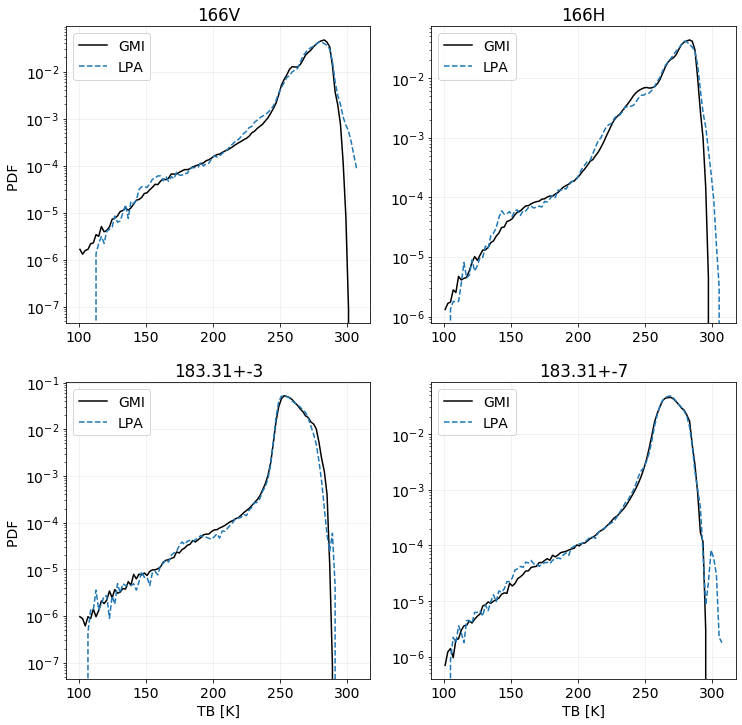

In [15]:
fig, ax = plt.subplots(2,2, figsize = [12, 12])
ax = ax.ravel()
titles = ["166V", "166H", "183.31+-3", "183.31+-7"]
for i in range(4):
    ax[i].plot(bin_center, hist_gmi[:, i], '-k', label = "GMI")
    ax[i].plot(bin_center, hist_lpa[:, i], '--', label = "LPA")
#    ax[i].plot(bin_center, hist_lpa_pr1[:, i], '--', label = "LPA_pr1")
#    ax[i].plot(bin_center, hist_esa[:, i], '--', label = "ESA")
#    ax[i].plot(bin_center, hist_esa_pr1[:, i], '-.' ,label = "ESA_pr1")
    ax[i].set_yscale("log")

    ax[i].legend()
    ax[i].set_title(titles[i])
    ax[i].grid('on', alpha = 0.2)
    
ax[2].set_xlabel("TB [K]")
ax[2].set_ylabel("PDF ")   
ax[3].set_xlabel("TB [K]")
ax[0].set_ylabel("PDF ")   
fig.savefig("PDF_TB_jun.pdf", bbox_inches = "tight")